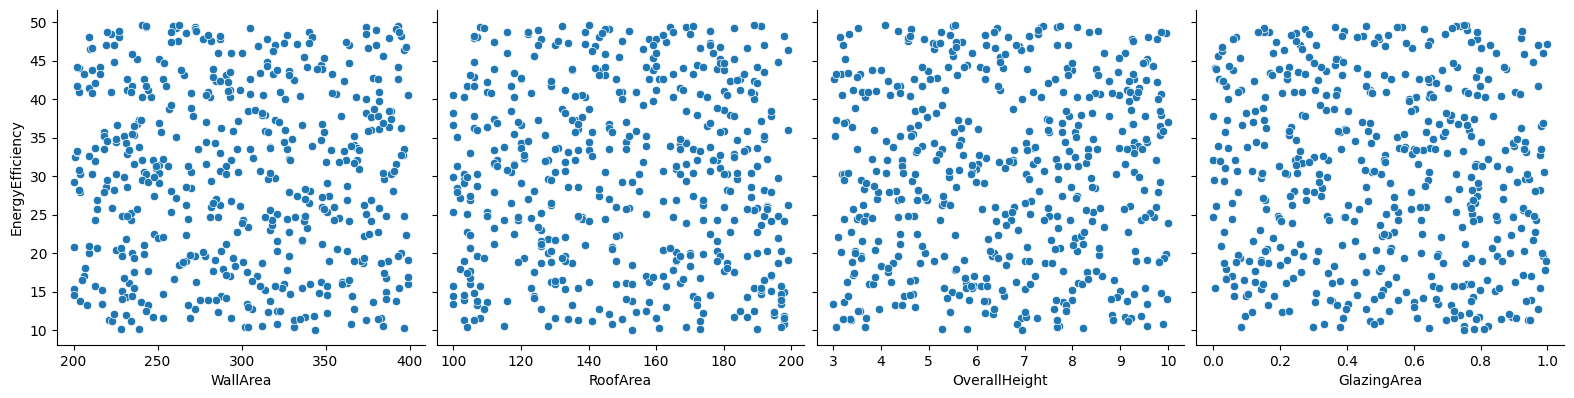

Mean Squared  Error: 146.02051889440582


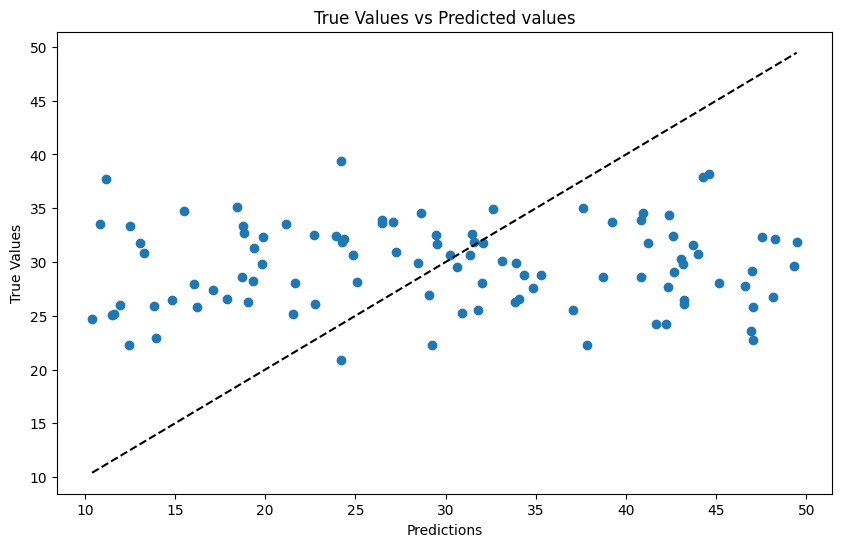

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy effeciency ratings


np.random.seed(0)
data_size = 500

data = {
    'WallArea': np.random.randint(200,400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0,1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy Efficiency Rating
}

df = pd.DataFrame(data)

# Date Preprocessing 

X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

# Visusalize the relationship between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

# Split the data set into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Train a random forest model

model = RandomForestRegressor() 
model.fit(X_train, y_train)


# Predict and evaluate

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared  Error: {mse}")

# Plot the True values vs predicted value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("True Values vs Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

